<a href="https://colab.research.google.com/github/YisusKraizz/Unidad3/blob/main/Unidad3/Practica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practica 4: Simular la demanda diaria de clientes en una tienda de telefono móviles.

##Contexto de la situación:

Imagina una tienda en línea que maneja inventarios de productos tecnológicos, como teléfonos móviles. La demanda diaria de estos productos es impredecible, afectada por promociones, tendencias y comportamiento del cliente. Los gestores de inventario enfrentan el reto de mantener un stock óptimo: demasiado inventario resulta en costos de almacenamiento altos, mientras que poco inventario resulta en pérdida de ventas y clientes. Para mejorar la gestión de inventarios, modelar la demanda diaria como una variable aleatoria es crucial. Esto permite realizar simulaciones para calcular el nivel de inventario que minimiza costos y maximiza ventas, asegurando satisfacer la demanda la mayoría de los días.

##Justificación de la distribución Poisson:

Para modelar la demanda diaria, la distribución Poisson es adecuada por varias razones:

Demanda discreta: La demanda diaria es un número entero de unidades.

Promedio constante: La demanda diaria puede variar, pero su promedio se mantiene constante.

Eventos independientes: La demanda de un día generalmente no depende de la de otro.

##Aplicación del método de la transformada inversa con la distribución Poisson:

Este método genera variables aleatorias que siguen una distribución Poisson, representando la demanda diaria de clientes:

Función de distribución acumulada (FDA): La FDA de Poisson se aproxima sumando las probabilidades acumuladas para diferentes valores de demanda.

Número aleatorio uniforme (U): Generar un número aleatorio uniforme entre 0 y 1.

Aplicar la transformada inversa: Encontrar el menor valor x tal que la FDA
𝐹
(
𝑥
)
≥
𝑈
, este valor será la demanda diaria simulada.

##Contexto de la simulación y justificación:

Simulación de demanda: Prever la cantidad de productos vendidos en un periodo determinado.

Optimización del inventario: Ejecutar múltiples simulaciones para calcular el nivel de stock óptimo que cubra la mayoría de los días sin excesos.

Datos históricos: Si los datos muestran que la demanda diaria oscila alrededor de un promedio constante (ej. 5 productos al día), la distribución Poisson es ideal.##

Modelado de eventos raros: La Poisson modela bien días de demanda excepcionalmente alta, como durante promociones.

<ipython-input-1-92073d175ffe>:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  F_k += (lambda_poisson**k * np.exp(-lambda_poisson)) / np.math.factorial(k)


Demanda diaria simulada: [10, 5, 6, 8, 10, 6, 4, 4, 7, 4, 8, 6, 9, 4, 2, 5, 4, 8, 6, 4, 5, 4, 0, 4, 2, 4, 3, 9, 6, 2, 4, 5, 6, 3, 2, 4, 9, 5, 12, 3, 10, 7, 3, 2, 9, 12, 4, 2, 9, 2, 3, 7, 1, 4, 5, 9, 8, 10, 11, 3, 7, 10, 6, 2, 3, 5, 7, 5, 5, 6, 3, 6, 6, 4, 6, 4, 6, 8, 6, 4, 2, 1, 6, 1, 2, 5, 5, 5, 5, 7, 4, 1, 6, 3, 9, 6, 4, 4, 6, 5]


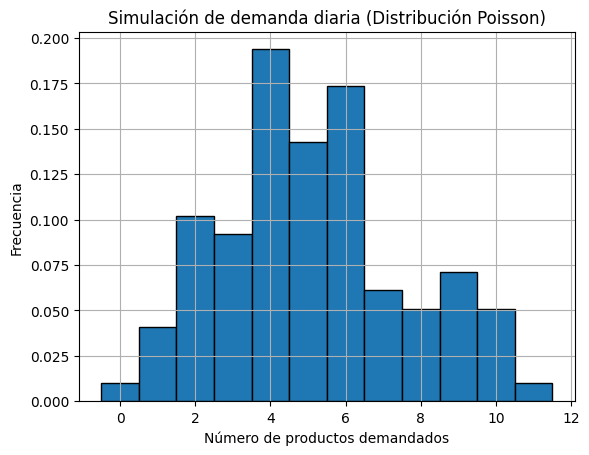

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro de la distribución Poisson (media de la demanda diaria)
lambda_poisson = 5  # Por ejemplo, 5 teléfonos móviles por día

# Generar una variable aleatoria uniforme U ~ Uniform(0, 1)
n = 100  # Número de simulaciones
U = np.random.uniform(0, 1, n)

# Aplicar la transformada inversa para la distribución Poisson
def poisson_inverse_transform(lambda_poisson, U):
    k = 0
    F_k = np.exp(-lambda_poisson)  # Primera probabilidad acumulada (k=0)
    while U > F_k:
        k += 1
        F_k += (lambda_poisson**k * np.exp(-lambda_poisson)) / np.math.factorial(k)
    return k

# Generar demanda simulada usando transformada inversa
demanda_simulada = [poisson_inverse_transform(lambda_poisson, u) for u in U]

# Mostrar los resultados
print("Demanda diaria simulada:", demanda_simulada)

# Graficar histograma de la demanda simulada
plt.hist(demanda_simulada, bins=np.arange(0, max(demanda_simulada) + 1) - 0.5, edgecolor='black', density=True)
plt.title("Simulación de demanda diaria (Distribución Poisson)")
plt.xlabel("Número de productos demandados")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


#Conclusión

El método de la transformada inversa con la distribución Poisson es efectivo para generar variables aleatorias que simulan la demanda de los clientes. Ayuda a gestionar niveles de inventario en un sistema donde la demanda diaria varía aleatoriamente, reduciendo costos de almacenamiento y pérdidas por falta de stock.